In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set_style("white") # seaborn 有五个主题可以设置 white是其中的一个

%matplotlib inline

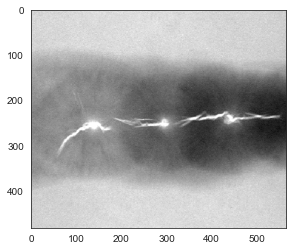

In [2]:
img_path = 'Images/exp_5.tif'
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# img = image/np.max(image) 看情况要不要归一化
plt.imshow(img,cmap = 'gray')

255


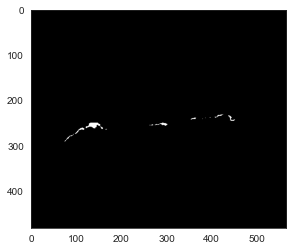

In [3]:
# th1 = np.percentile(img,99.8)
# print(th1)
ret, img_th1 = cv2.threshold(img ,253, 256, cv2.THRESH_BINARY)
# plt.imshow(img_th1,"gray")
# 这里结构元需要选取的合适
stru_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
#stru_elem = np.ones((3,3), np.uint8)
# 这里形态学腐蚀的次数少一点多，多了图像无法复原
img_erosion = cv2.erode(img_th1, stru_elem)
# img_erosion = cv2.erode(img_erosion, stru_elem)
plt.imshow(img_erosion,"gray")
print(img_erosion.max())

In [6]:
# 定义一个栈，方便进行压栈出栈操作
class stack:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def push(self,item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def size(self):
        return len(self.items)

In [7]:
def Q(sx,sy,px,py,img,T = 68):
    if np.abs(int(img[px,py]) - int(img[sx,sy]))<T:
        return True
    else:
        return False
c8 = [(1,0),(1,-1),(0,-1),(-1,-1),(-1,0),(-1,1),(0,1),(1,1)]


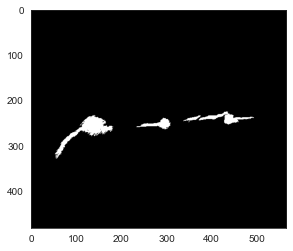

In [15]:
img_grow = img_erosion.copy()
seeds_X,seeds_Y = np.where(img_grow >= 255) # 种子点的坐标X，Y
sstack = stack()

# 从img_erosion 开始 计算，原图模板是img
m,n = img.shape
for (x,y) in zip(seeds_X,seeds_Y):
    sstack.push((x,y))

while(sstack.size() != 0):
    now_seed = sstack.pop()
    for p in c8:
        px,py = p
        next_px = now_seed[0]+px
        next_py = now_seed[1]+py
        
        # 边界以内
        if next_px >0 and next_px < m and next_py >0 and next_py<n:
            # 已经是255，不需要生长
            if img_grow[next_px,next_py] == 255:
                continue
            if Q(px,py,next_px,next_py,img,T = 43):
                img_grow[next_px,next_py] = 255
                sstack.push((next_px,next_py))

plt.imshow(img_grow,"gray")

In [ ]:
sstack.items